In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
app_train.corr()['AMT_INCOME_TOTAL']

SK_ID_CURR                                 -0.001820
TARGET                                     -0.003982
NAME_CONTRACT_TYPE                         -0.003531
FLAG_OWN_CAR                                0.083383
FLAG_OWN_REALTY                             0.002934
CNT_CHILDREN                                0.012882
AMT_INCOME_TOTAL                            1.000000
AMT_CREDIT                                  0.156870
AMT_ANNUITY                                 0.191657
AMT_GOODS_PRICE                             0.159610
REGION_POPULATION_RELATIVE                  0.074796
DAYS_BIRTH                                 -0.027261
DAYS_EMPLOYED                              -0.013005
DAYS_REGISTRATION                           0.027805
DAYS_ID_PUBLISH                             0.008506
OWN_CAR_AGE                                -0.117273
FLAG_MOBIL                                  0.000325
FLAG_EMP_PHONE                              0.063994
FLAG_WORK_PHONE                            -0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
#因為 TARGET 是 0,1 的類別型資料，所以觀察相關係數並無特別意義，故選擇 AMT_INCOME_TOTAL客戶總收入來看相關性
corr_table=app_train.corr()['AMT_INCOME_TOTAL'].sort_values(ascending=False)

In [5]:
print(f'相關係數最大的前 15 個欄位: \n{corr_table.head(15)}')

相關係數最大的前 15 個欄位: 
AMT_INCOME_TOTAL                        1.000000
AMT_ANNUITY                             0.191657
AMT_GOODS_PRICE                         0.159610
AMT_CREDIT                              0.156870
FLOORSMIN_AVG                           0.139860
FLOORSMIN_MEDI                          0.138489
FLOORSMIN_MODE                          0.131800
LIVINGAPARTMENTS_AVG                    0.106920
OCCUPATION_TYPE_Managers                0.105501
LIVINGAPARTMENTS_MEDI                   0.104914
NAME_EDUCATION_TYPE_Higher education    0.095342
LIVINGAPARTMENTS_MODE                   0.092991
COMMONAREA_AVG                          0.089616
COMMONAREA_MEDI                         0.087918
FLAG_OWN_CAR                            0.083383
Name: AMT_INCOME_TOTAL, dtype: float64


In [6]:
print(f'相關係數最小的後 15 個欄位: \n{corr_table.tail(15)}')

相關係數最小的後 15 個欄位: 
ORGANIZATION_TYPE_Kindergarten                      -0.019907
OCCUPATION_TYPE_Sales staff                         -0.023750
NAME_INCOME_TYPE_Working                            -0.024522
NAME_FAMILY_STATUS_Widow                            -0.025561
DAYS_BIRTH                                          -0.027261
EXT_SOURCE_3                                        -0.030229
FLAG_DOCUMENT_6                                     -0.045878
NAME_INCOME_TYPE_Pensioner                          -0.064018
ORGANIZATION_TYPE_XNA                               -0.064038
DAYS_EMPLOYED_ANOM                                  -0.064038
CODE_GENDER_F                                       -0.074731
REGION_RATING_CLIENT                                -0.085465
NAME_EDUCATION_TYPE_Secondary / secondary special   -0.090043
REGION_RATING_CLIENT_W_CITY                         -0.091735
OWN_CAR_AGE                                         -0.117273
Name: AMT_INCOME_TOTAL, dtype: float64


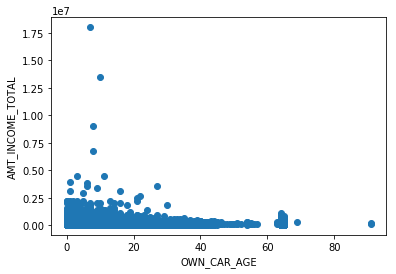

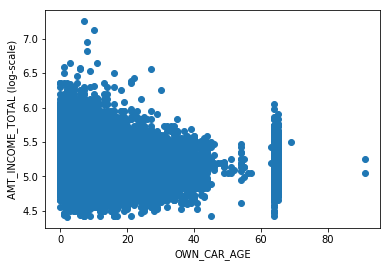

In [7]:
#客戶年收入與車齡的相關性 
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.scatter(abs(app_train['OWN_CAR_AGE']) , app_train['AMT_INCOME_TOTAL'])
plt.show()

plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.scatter(app_train['OWN_CAR_AGE'] , np.log10(app_train['AMT_INCOME_TOTAL']))
plt.show()

In [8]:
import seaborn as sns

In [9]:
first15=app_train[corr_table[0:5].index]

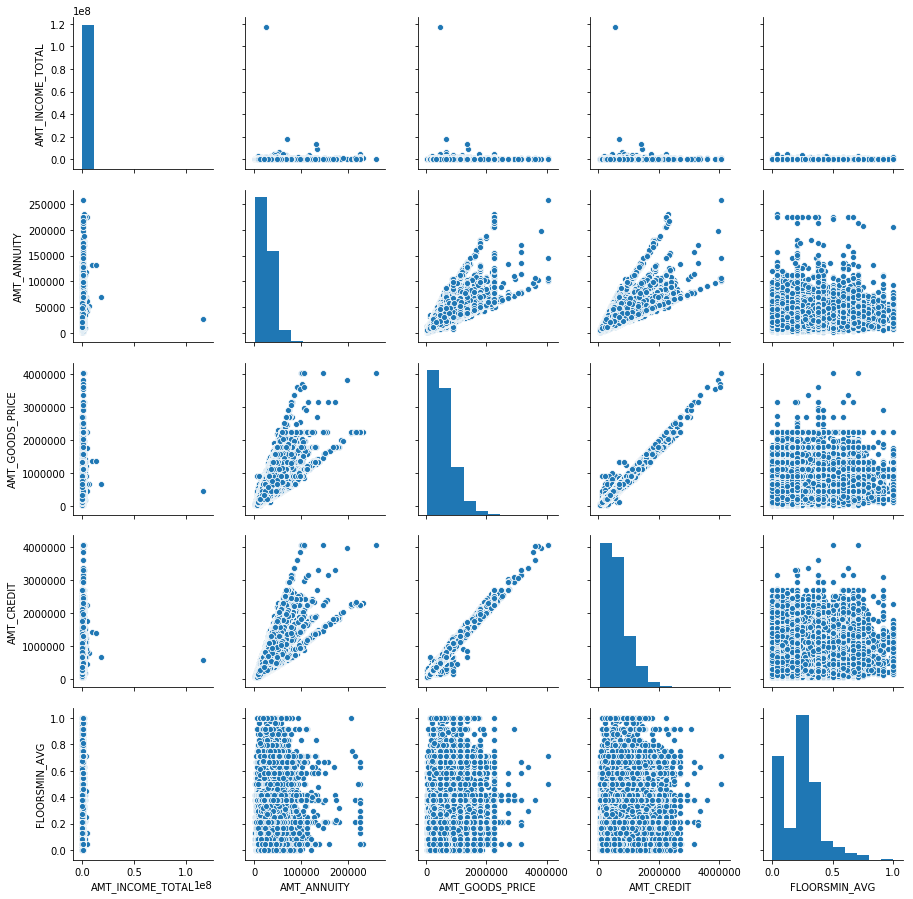

In [11]:
#取相關數最大的前五個欄位來做配對相關性的觀察
sns.pairplot(data=first15.iloc[: , :5]);

由以上25 張圖來看，就會發現相關係數用在類別型資料並不恰當，就算是相關係數的數值很高但是從圖形上卻發現不見得有呈現正相關的向上趨勢。